In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
from astropy.io import fits
from astropy.table import table
from astropy import wcs
from __future__ import division
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.nddata import Cutout2D
from matplotlib.colors import LogNorm
import fnmatch
import re
import matplotlib.colors as colors
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
import regions
from regions import CircleSkyRegion
from astropy.coordinates import Angle
%matplotlib inline

# Make plots readable
# Update plot params
params = {'legend.fontsize': 14,
	  'figure.figsize': (6,5),
	 'axes.labelsize': 16,
	 'axes.titlesize':16,
	 'xtick.labelsize':14,
	 'ytick.labelsize':14}
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
plt.rcParams.update(params)

In [2]:
filename = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci_spec_extract.cat'
dat = ascii.read(filename)
sdf = pd.DataFrame(dat.as_array())
sdf.columns.values

array(['NUMBER', 'X_IMAGE', 'Y_IMAGE', 'X_WORLD', 'Y_WORLD', 'A_IMAGE',
       'B_IMAGE', 'THETA_IMAGE', 'MAG_AUTO', 'MAGERR_AUTO', 'FLUX_AUTO',
       'FLUXERR_AUTO', 'FLUX_RADIUS', 'BACKGROUND', 'FLAGS', 'FLUX_APER',
       'FLUX_APER_1', 'FLUX_APER_2', 'FLUX_APER_3', 'FLUXERR_APER',
       'FLUXERR_APER_1', 'FLUXERR_APER_2', 'FLUXERR_APER_3'], dtype=object)

In [3]:
filename = '/data/emiln/XLSSU122/id_ra_dec_col_match4.out'
# dat = ascii.read(filename)
# jondf = pd.DataFrame(dat.as_array())
jondf = pd.read_csv(filename,delim_whitespace=True,header=None)
jondf
jondf.columns = ['id','ra','dec','color','id2','z','f140w_kron','f140w_ap','f105w_ap']
jondf.columns.values
jondf

,id,ra,dec,color,id2,z,f140w_kron,f140w_ap,f105w_ap
0,1,34.434732,-3.784423,74.0363,1,-99.000000,24.9472,24.9637,99.0000
1,2,34.440613,-3.779798,3.8500,2,-99.000000,18.1632,19.3027,23.1527
2,3,34.432786,-3.783057,73.6949,3,-99.000000,25.0140,25.3051,99.0000
3,4,34.433330,-3.781692,76.7364,4,-99.000000,21.6664,22.2636,99.0000
4,5,34.436870,-3.780736,75.5958,5,-99.000000,22.7117,23.4042,99.0000
5,6,34.431393,-3.782256,74.6900,6,-99.000000,24.2201,24.3100,99.0000
6,7,34.434092,-3.782059,72.3371,7,-99.000000,26.7170,26.6629,99.0000
7,8,34.438399,-3.781469,74.0827,8,-99.000000,22.4437,24.9173,99.0000
8,9,34.432396,-3.781529,74.5121,9,-99.000000,23.8882,24.4879,99.0000
9,10,34.431597,-3.782020,72.4080,10,-99.000000,26.4857,26.5920,99.0000


In [4]:
# filter out objects with no f105,f140, or very faint
magthresh=25
# zthresh=0.1
zthresh=0.03
filtdf = jondf[(jondf['f105w_ap']<50) & (jondf['f140w_ap']<50) & (jondf['f140w_kron']<magthresh)]
print len(jondf), len(filtdf)
cdf = filtdf[abs(filtdf['z']-1.98)<zthresh]
print len(cdf)

1374 392
44


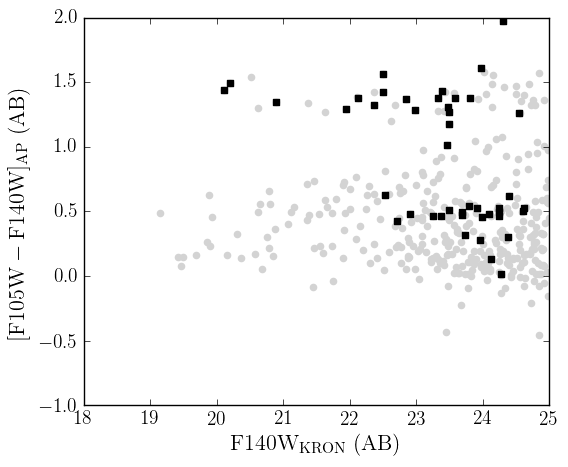

In [5]:
plt.scatter(filtdf['f140w_kron'],filtdf['color'],color='lightgrey')
plt.scatter(cdf['f140w_kron'],cdf['color'],color='black',marker='s')
plt.ylim([-1,2])
plt.xlim([18,magthresh])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')
# plt.axhline(1.15,color='r',linestyle='--')
# plt.axhline(1.65,color='r',linestyle='--')
# plt.savefig('../CMD_ALL+SPEC+RSHIGHLIGHT_zthresh_'+str(zthresh)+'.pdf')

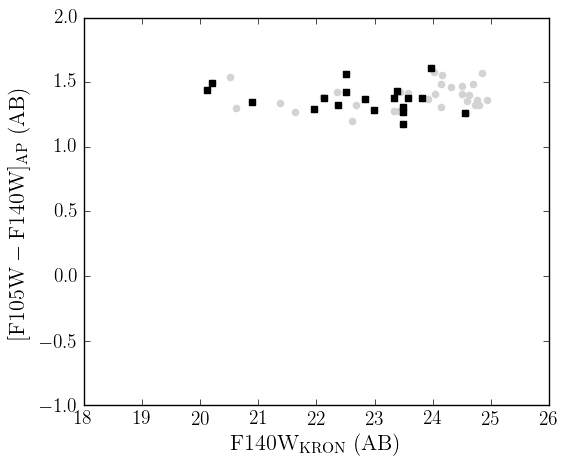

In [6]:
RSl=1.15
RSu=1.65
RSfiltdf=filtdf[(RSl<filtdf['color']) & (filtdf['color']<RSu)]
RScdf = cdf[(RSl<cdf['color']) & (cdf['color']<RSu)]
plt.scatter(RSfiltdf['f140w_kron'],RSfiltdf['color'],color='lightgrey')
plt.scatter(RScdf['f140w_kron'],RScdf['color'],color='black',marker='s')
plt.ylim([-1,2])
plt.xlim([18,26])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')
# plt.savefig('../CMD_RSONLY_zthresh_'+str(zthresh)+'.pdf')

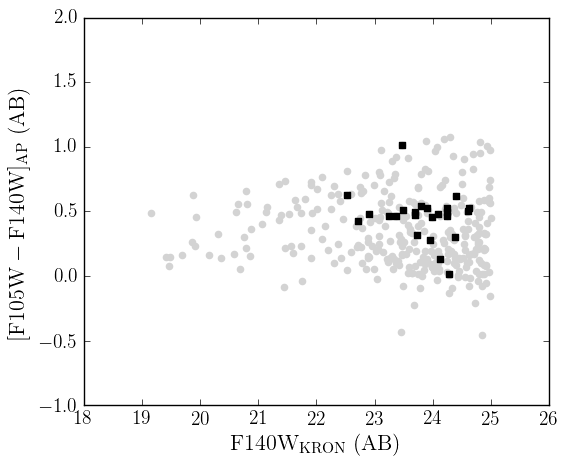

In [7]:
BSfiltdf=filtdf[filtdf['color']<RSl]
BScdf = cdf[cdf['color']<RSl]
plt.scatter(BSfiltdf['f140w_kron'],BSfiltdf['color'],color='lightgrey')
plt.scatter(BScdf['f140w_kron'],BScdf['color'],color='black',marker='s')
plt.ylim([-1,2])
plt.xlim([18,26])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')
# plt.savefig('../CMD_BSONLY_zthresh_'+str(zthresh)+'.pdf')

In [8]:
OIII_thresh06 = np.array([1002, 1125, 1141, 1180, 1186, 1295,  153,  329,  379,  386,  408,
        445,  449,  451,  466,  575,  607,  662,  690,  786,  873])
OIII_thresh08 = np.array([1186, 1295,  153,  379,  386,  445,  451,  466,  690,  786,  873])
OIII_thresh1 = np.array([1186, 1295,  153,  379,  386,  445,  451,  466,  786,  873])

OIII_thresh06 = np.array([1125, 1141, 1180,  329,  386,  408,  445,  451,  466,  873]) #with z_thresh 0.03

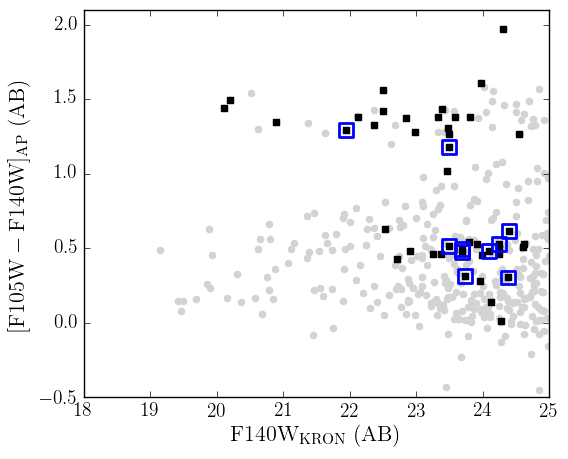

In [9]:
plt.scatter(filtdf['f140w_kron'],filtdf['color'],color='lightgrey')
plt.scatter(cdf['f140w_kron'],cdf['color'],color='black',marker='s')
plt.scatter(cdf[cdf['id'].isin(OIII_thresh06)]['f140w_kron'],cdf[cdf['id'].isin(OIII_thresh06)]['color'],color='black',marker='s',facecolors='none',s=100,linewidth=2,edgecolors='blue')
plt.ylim([-0.5,2.1])
plt.xlim([18,magthresh])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')
plt.savefig('../CMD_OIIIHB_0.6_zthresh_'+str(zthresh)+'.pdf')

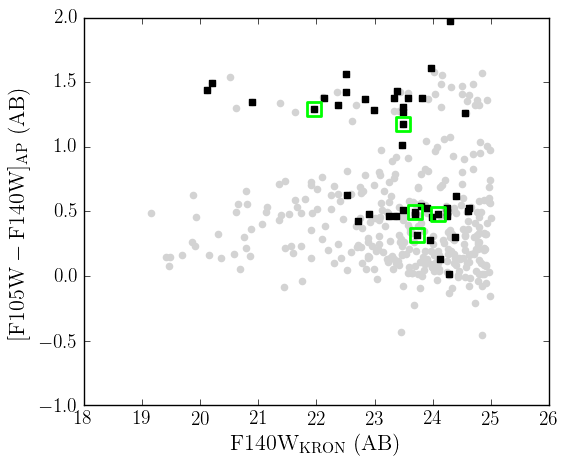

In [10]:
plt.scatter(filtdf['f140w_kron'],filtdf['color'],color='lightgrey')
plt.scatter(cdf['f140w_kron'],cdf['color'],color='black',marker='s')
plt.scatter(cdf[cdf['id'].isin(OIII_thresh08)]['f140w_kron'],cdf[cdf['id'].isin(OIII_thresh08)]['color'],color='black',marker='s',facecolors='none',s=100,linewidth=2,edgecolors='lime')
plt.ylim([-1,2])
plt.xlim([18,26])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')

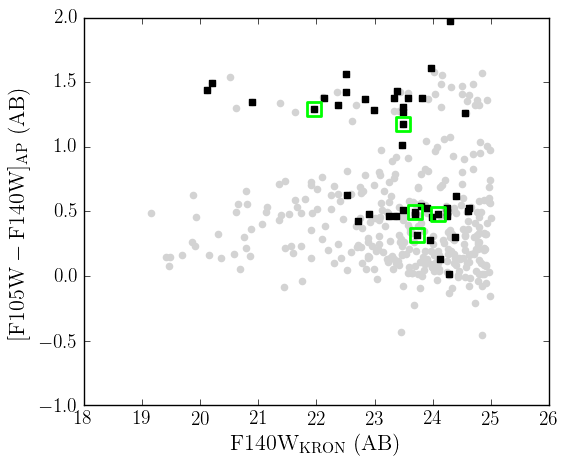

In [11]:
plt.scatter(filtdf['f140w_kron'],filtdf['color'],color='lightgrey')
plt.scatter(cdf['f140w_kron'],cdf['color'],color='black',marker='s')
plt.scatter(cdf[cdf['id'].isin(OIII_thresh1)]['f140w_kron'],cdf[cdf['id'].isin(OIII_thresh1)]['color'],color='black',marker='s',facecolors='none',s=100,linewidth=2,edgecolors='lime')
plt.ylim([-1,2])
plt.xlim([18,26])
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')

-------------

# 2019

In [12]:
df = pd.read_csv('../xlssc122_F105_F140_redshifts_short_v3_snr_em_member2_by_hand.cat',delim_whitespace=True)
df['color'] = df['(f105)kron']-df['(f140)kron']
# filtdf = df[(df['(f105)kron']<50) & (df['(f140)kron']<50)]
# df = filtdf
df_members = df[df['member1']>0.5]
print len(df_members)
df_members = df[((df['member1']>0.5) & (df['(f140)kron']<24)) | (
    ((df['member1']>0.5) & (df['(f140)kron']<24.5) & (df['em-code']==1)))]
print len(df_members)
df_foreground = df[((df['member2']>0.5) & (df['(f140)kron']<24)) | (
    ((df['member2']>0.5) & (df['(f140)kron']<24.5) & (df['em-code']==1)))]
print len(df_foreground)
em_members = df_members[df_members['em-code']==1]
print len(em_members)
em_members[['phot-id','ra','dec']]

48
27
13
7


,phot-id,ra,dec
66,920,34.435628,-3.753143
111,375,34.444096,-3.765667
144,604,34.439389,-3.760298
196,726,34.430604,-3.757624
213,240,34.451580,-3.770285
215,554,34.435274,-3.762475
279,266,34.421055,-3.769239


In [13]:
df.columns.values

array(['phot-id', 'ra', 'dec', '(f105)kron', 'ekron', '0p8', 'e0p8',
       '(f140)kron', 'ekron.1', '0p8.1', 'e0p8.1', 'fwhm(asec)', 'zz',
       'zlo', 'zhi', 'chi', 'spec-id', 'mcode', 'snr', 'em-code',
       'member1', 'member2', 'color'], dtype=object)

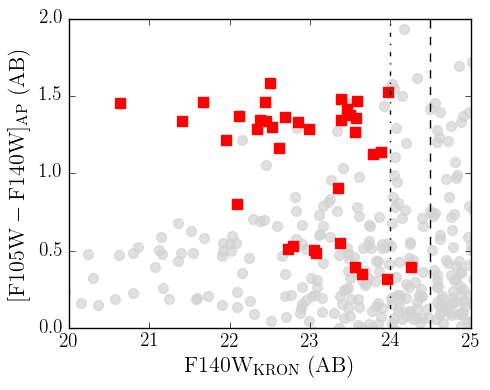

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(df['(f140)kron'],df['color'],color='lightgrey',alpha=0.7,s=50)
plt.scatter(df_members['(f140)kron'],df_members['color'],color='red',marker='s',s=50)
plt.scatter(df_foreground['(f140)kron'],df_foreground['color'],color='red',marker='s',s=50)
# plt.scatter(cdf[cdf['id'].isin(OIII_thresh1)]['f140w_kron'],cdf[cdf['id'].isin(OIII_thresh1)]['color'],color='black',marker='s',facecolors='none',s=100,linewidth=2,edgecolors='lime')
plt.ylim([0,2])
plt.xlim([20,25])
plt.axvline(24.5,linestyle='--',color='black')
plt.axvline(24,linestyle='-.',color='black')
plt.xlabel(r'$\mathrm{F140W_{KRON}~(AB)}$')
plt.ylabel(r'$\mathrm{[F105W-F140W]_{AP}~(AB)}$')
plt.tight_layout()
plt.savefig('../Chandra proposal/2019_XLSSC_CMD_wide.pdf',bbox_inches='tight')